# FIT 1043 Introduction to Data Science

   ## Assignment 2

#### Name: Chris Law Zi Qing 
#### Student ID: 34112804

## Part A : Classification

### A1. Supervised Learning

#### A1.1

### Supervised Machine Learning : 

In artificial intelligence, this is a method of training a model by using data that have already been labeled in order to train the model with the best possible outcomes. As a result, in this approach, the input examples are included in the training data, along with their corresponding output labels. It has been found that one of the goals of supervised learning is to develop a program that, with the help of artificial intelligence, can predict the outcome of a given input by building an algorithm.

A supervised machine learning model is trained from a labeled dataset containing examples of inputs and labels corresponding to their results. Model parameters are adjusted by the learning algorithm to minimize the difference between predicted and actual outcomes, optimizing the loss function. As a result of learning this mathematical representation, the model can make predictions about unknown inputs in the future. The method is fundamental to numerous applications, including spam detection and financial trend prediction.

It is widely recognized that supervised learning is effective in large part because of the quality and quantity of labeled data available for training. Typically, a model's performance is evaluated on a separate set of data known as the test set after it has been trained. This allows the model to be evaluated in relation to newly acquired data.

### Notion of Labelled Data: 

It is essential to have labeled data in supervised learning because it provides examples from which the algorithm can learn. There are labels associated with each piece of data in the dataset that indicate the correct output. The labels provide the correct outputs or answers for given inputs, guiding the learning process. As an example, in a music genre classification task each song is accompanied by a label that indicates its genre, such as rock, jazz, or classical. As a result of learning from these examples, the algorithm is able to predict the genre of unseen songs based on patterns and characteristics unique to each genre.

### Train and Test Datasets:

Training Dataset: 

The training dataset is used primarily for learning the relationships between input features and outputs. In order to demonstrate how the input variables relate to the desired output, the model uses the dataset as raw material. The input data constitutes a significant proportion of the total dataset, and it is made up of both the input data as well as the associated labels. An algorithm such as decision trees, or linear classifiers analyzes the training data and attempts to build a general model that effectively maps inputs to outputs during the training phase.

Testing Dataset: 

The testing dataset is used to evaluate the effectiveness and performance of the trained model as well as its effectiveness in the real world. By using this data, the model is able to predict future outputs. The primary objective is to determine whether the model can generalize its learning to new, unforeseen data. In this dataset, inputs and their true labels are included, like the training set, which is a smaller fraction of the total dataset. There is a crucial point to keep in mind when it comes to the testing dataset not being used to train the model. As fresh data is provided, it helps validate the accuracy of the model's predictions, ensure that it does not overfit, and ensure that it works across a variety of different input situations.

#### A1.2

In [267]:
import pandas as pd

music = pd.read_csv('FIT1043-MusicGenre-Dataset.csv')

Necessary library is imported and the csv is read.

In [268]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,77382,Sheena Ringo,獣ゆく細道,48,0.01340,0.423,224053,0.799,0.000004,0.1470,-4.227,0.0447,124.626,0.5560,1
1,23554,empty_field,Fossil Roo,22,0.86200,0.590,151067,0.221,0.468000,0.0736,-16.338,0.0383,129.984,0.0331,1
2,82886,The Beatles,Dear Prudence - 2018 Mix,62,0.09040,0.395,234973,0.538,0.000453,0.0685,-10.300,0.0456,150.785,0.3690,9
3,37772,Pink Floyd,Have a Cigar,64,0.40700,0.454,307733,0.650,0.049800,0.5890,-10.191,0.0437,120.154,0.7200,9
4,80191,A-Trak,Push,43,0.00145,0.642,213512,0.877,0.002790,0.0984,-2.878,0.0450,126.058,0.4960,5


In [269]:
features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

X = music[features]
y = music['music_genre']

A list of features is defined, including columns such as "popularity", "acousticness", "danceability", among others, considered to be relevant for predicting genres of music. In the following step, the X variable is created in order to store these features extracted from the music data frame, in order to serve as input to a machine learning model. At the same time, the y variable is assigned the 'music_genre' column from the same DataFrame, which serves as the target output of the model.

#### A1.3

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

As a result of the code, the dataset is divided into training and testing subsets. The data is divided into two parts: X_train and X_test regarding the features; and Y_train and Y_test regarding the labels, with 25% allocated to the test set (test_size=0.25) and the remaining 75% allocated to the training set.

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In the first step, we utilize the train_test_split function from scikit-learn, which is used to separate the dataset into two parts: one for training and one for testing the machine learning model. In this case, the function is imported from the sklearn.model_selection module. There are two distinct sets of data in the dataset: features, which are used to make predictions, and labels, which are the values the model is attempting to predict. Data is split so that 20% is allocated for testing and 80% for training.

### A2. Classification (training)

#### A2.1

### Binary Classification:

The binary classification model is an approach to machine learning that focuses on categorizing data points into one of two distinct categories. The model uses a supervised learning algorithm, which is trained with a labeled dataset. The results of the model can then be used to make decisions about new data. Binary classification is most useful for predicting the outcome of a binary event, such as whether a customer will make a purchase or not. There are several ways to measure the model's success, such as accuracy rate, the F1-Score, and the confusion matrix. Classification models are evaluated based on Accuracy and F1-Score, where Accuracy measures overall prediction accuracy and F1-Score reflects precision, correctness, and false positive rate. Additionally, the confusion matrix provides a detailed breakdown of the model's prediction. It shows precisely how many true positives, false positives, true negatives, and false negatives were predicted. As a result of combining these metrics, a comprehensive framework can be established for assessing and optimizing model performance. 

### Multi-class Classification:

A multi-class classification expands the concept of binary classification by addressing situations where more than two distinct categories are required for categorizing data. As an example, sorting apples, bananas, and oranges into separate bins is similar to sorting fruits into different types of baskets. In most cases, One-vs.-Rest (OvR) and One-vs.-One (OvO) strategies are used. The OvR technique involves the training of a series of classifiers which distinguish each category from all other categories, effectively isolating one group at a time. A comparison of OvO with OvS involves the creation of classifiers for every possible pair of categories and the selection of the most commonly predicted category as the final classification. In order to evaluate such models, traditional binary classification metrics are adapted and extended to accommodate multiple classes. It is typical for these metrics to be weighted according to the prevalence of each class in order to ensure that the model's performance and accuracy are evaluated fairly and comprehensively across these varying categories.

### Differences:

- A binary classification can be described as involving two classes or two opposing categories, such as yes/no decisions, whereas a multi-class classification can be described as including three or more categories, for example, a fruit classification or a news classification.

- It is important to note that binary classification generates only one probability score per class, often necessitating the establishment of a threshold to determine whether an instance belongs to a given class. The multi-class classification, on the other hand, allocates a probability score to each category, with the classification being determined by the category receiving the highest probability score.

- For binary classification, algorithms such as logistic regression and support vector machines are designed inherently for two classes and are generally simpler. In multi-class classification, these algorithms must be adapted to handle multiple classes, such as multinomial logistic regression or complex decision trees.

#### A2.2 Part a:

In order to avoid bias caused by varying scales, normalizing or scaling data for classification tasks is crucial. The model's decisions could be disproportionately affected by features with larger numerical ranges if the features are left unnormalized. The model might erroneously prioritize the larger scale feature if, for example, one is measured in thousands while the other is measured in fractions. As a result of normalization, different features of the data can be analyzed equally by adjusting the scale. Most machine learning algorithms rely on distance calculations to make their predictions, such as the k-nearest neighbors (k-NN) algorithm and logistic regression, which is a gradient descent-based algorithm. Normalization makes the training process faster and more reliable by making sure all features are on a similar scale.

#### A2.2 Part b:

#### A2.3 Part a & b

Support Vector Machines (SVM) are machine learning algorithms known for classifying data effectively. In SVM, the goal is to determine an optimal line that divides a plane of data points into two categories. As SVM's primary objective is to maximize the margin between the closest data points of each group, it is primarily concerned with defining the hyperplane. This is so that the margin can be maximized. Since these nearest data points play a major role in determining where the hyperplane will be located, they are referred to as support vectors.

Whenever a linear boundary cannot be used to separate the data, SVM employs a technique known as the kernel trick. To achieve separation, the data is transformed into a higher dimensional space where a hyperplane can be used effectively. SVM ensures robust and definitive classification by maximizing the distance between the closest members of different groups. Consequently, SVM is an excellent tool for recognizing images and classifying text in applications requiring precise categorization.

The kernel trick is used in situations where data cannot be separated linearly using SVM. The purpose of this technique is to transform the data into a higher-dimensional space in which a separating hyperplane can be effectively applied. Therefore, SVM ensures a robust and definitive classification, which makes it particularly suitable for applications like image recognition and text classification, which require precise classification.

There are various kernel functions that are used in SVMs to handle different types of data complexity. Generally, linear kernels are suitable for datasets in which features can be separated linearly, whereas polynomials and Radial Basis Functions (RBFs) are suitable for datasets in which relationship between features is not linear. In order for the model to be able to generalize and accurately classify new data, the kernel selection is critical.

SVM is an invaluable tool in many fields, including digital image processing, bioinformatics, and speech recognition, because of its ability to model complex patterns and versatility in handling various types of data. SVM's utility is enhanced by the kernel trick, in particular, because it is capable of effectively modeling intricate datasets.

#### A2.3 Part c

In [272]:
!pip install scikit-learn

In [273]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm_classifier_model = SVC(kernel='rbf', random_state=0, C=10, gamma= 0.06)

svm_classifier_model.fit(X_train, y_train)

y_pred = svm_classifier_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy Rate: {accuracy * 100:.2f}%")

Confusion Matrix:
[[233   8  14   5 111  25  62  36  29 144]
 [ 23 453  51  36  18  18   0  11   0   3]
 [ 29  51 368   8  91  29   2  65   0  33]
 [ 13  27  18 529   1  13   0  21   0   1]
 [ 47  12  42   1 372  16  14  42   4 116]
 [ 45  28  42   9  28 404  24  55   5  24]
 [ 31   0   3   0  12   7 367   6 221  42]
 [ 14  10  81  49  39  79  13 296   2  28]
 [ 22   0   3   0   9   2 270   5 239  72]
 [ 55   3   2   1  53   1  17  14  37 476]]
Accuracy Rate: 57.58%


In order to manage the decision boundary curvature of the SVM classifier, a gamma parameter of 0.06 is used with the initialization of an 'rbf' kernel and a C parameter of 10 applied to control the trade-off between classification error and model complexity. An initial model is constructed by training it on a subset of data (X_train and y_train), and then predicting it on a test dataset (X_test). In order to assess the performance of the model, a confusion matrix is generated and an accuracy rate is calculated, which are printed out. These results provide insight into the model's ability to accurately classify the data and pinpoint any specific areas where it exhibits strength or weakness.

#### A.2.4

In [274]:
from sklearn.ensemble import RandomForestClassifier

randomForest_classifier_model = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=0)

randomForest_classifier_model.fit(X_train, y_train)

y_pred = randomForest_classifier_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100  

print("Confusion Matrix:")
print(cm)
print(f"Accuracy Rate: {accuracy:.2f}%")

Confusion Matrix:
[[239   5  13   2  87  40  64  39  29 149]
 [ 21 457  41  43  14  22   0  10   0   5]
 [ 34  47 365   7  76  33   4  73   1  36]
 [ 12  19  18 537   2  12   0  18   0   5]
 [ 48  13  20   0 402   4  12  45   7 115]
 [ 44  25  46   8  29 378  12  81   9  32]
 [ 28   1   2   0   4   7 329   2 278  38]
 [ 22   7  66  47  40  68  13 316   2  30]
 [ 27   1   1   0   7   2 311   4 195  74]
 [ 67   7   8   1  59   2  29  15  24 447]]
Accuracy Rate: 56.47%


A specific set of parameters is used to initialize the model: n_estimators=300 to indicate how many trees are included in the forest, criterion='entropy' to indicate how much information can be gathered from a larger dataset, random_state=0 to ensure the results are reproducible. An accuracy rate and confusion matrix are computed in order to evaluate the performance of the model. As a result of the confusion matrix, we can identify areas in which the model performs well or poorly, based on a breakdown of the predictions for the actual and predicted classes. 

### A3. Classification (prediction)

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
svm_classifier_model = SVC(kernel='rbf', random_state=0, C=10, gamma=0.06)
randomForest_classifier_model = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=0)

svm_classifier_model.fit(X_train, y_train)
randomForest_classifier_model.fit(X_train, y_train)

y_pred_svm = svm_classifier_model.predict(X_test)
y_pred_rf = randomForest_classifier_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In this code, we demonstrate the initialization, training, and evaluation of two machine learning models on a dataset, specifically, a Support Vector Machine (SVM) with a RBF kernel and a Random Forest. A higher C value is applied to the SVM, and gamma is set to 0.06, which optimizes the classification boundary and the influence of training examples. This Random Forest is configured with 300 trees and splits based on entropy. A testing dataset is used to evaluate the performance of both models which have been trained on the same training data. A confusion matrix and accuracy rate are used to evaluate the performance of these models, providing insights into their effectiveness in classification, as well as allowing a comparison to determine which model performs best based on how it handles the data and makes predictions more accurately. 

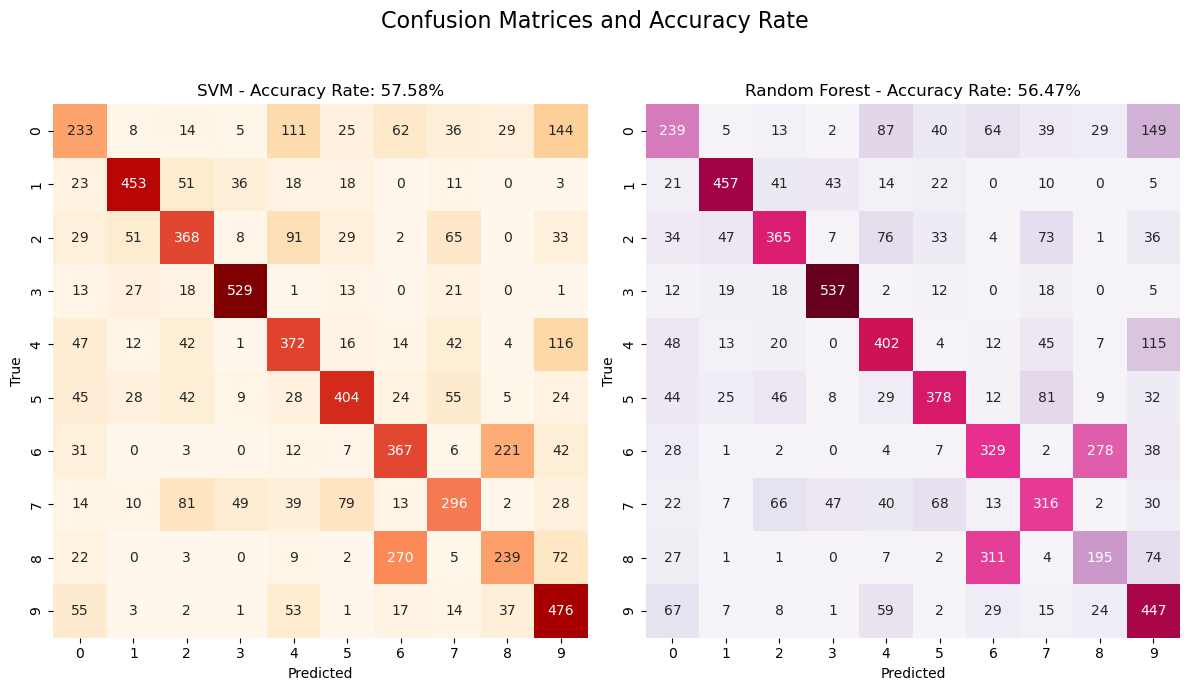

In [308]:
plt.figure(figsize=(12, 7))
plt.suptitle('Confusion Matrices and Accuracy Rate', fontsize=16)

plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title(f'SVM - Accuracy Rate: {accuracy_svm:.2%}')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='PuRd', cbar=False)
plt.title(f'Random Forest - Accuracy Rate: {accuracy_rf:.2%}')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Accuracy:

SVMs have a higher accuracy rate than Random Forests. The results indicate that, in general, the SVM model correctly classified a greater percentage of the cases in the test dataset. A metric like this can be useful for determining the general performance of a model, but should be considered in light of the data balance between the classes and the importance of accurate predictions.

### Suitability for Specific Applications:

It may also be necessary to consider specific application requirements when choosing between SVM and Random Forest. In situations where overfitting must be avoided and heterogeneous features must be handled, Random Forest may be preferable because it is robust against overfitting and is capable of handling non-linear relationships despite its lower accuracy.

### Conclusion:

Due to the higher accuracy rate of SVM, it might be considered to be the better model in situations where a high level of accuracy is essential. To make an informed decision, it is important to take into account how each model performs in terms of precision, recall, and the specific requirements of the application. As long as the SVM consistently shows superior performance across these metrics, it would indeed be a better choice in the long run. It is possible, however, that a Random Forest may still be the preferred model for specific use cases if it demonstrates strengths in areas where SVMs are weak such as specific classes that are critical to the accomplishment of the task.

### A4. Independent evaluation

In [276]:
MusicGenre_submission_data = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
X_submission = MusicGenre_submission_data[features]
X_submission_scaled = scaler.transform(X_submission)

predicted_genres = svm_classifier_model.predict(X_submission_scaled)

result = pd.DataFrame({
    'instance_id': MusicGenre_submission_data['instance_id'],
    'music_genre': predicted_genres
})

result_filename = '34112804-ChrisLawZiQing-v6.csv'
result.to_csv(result_filename, index=False)

The provided code outlines the steps to be followed in order to make music genre predictions based on submission data that has been pre-trained using SVMs. The model is trained using data loaded from a CSV file and specific features selected during the training process. After the data has been preprocessed, a prefitted StandardScaler is used to standardize it in accordance with the preprocessing of the training data. The SVM model then predicts the music genres for the scaled features, and the results are compiled into a DataFrame together with their respective instance IDs. In the final step, this DataFrame is saved to a CSV file, which can then be submitted or analyzed in more detail. 

## Part B : Selection of Dataset and perform Clustering

### B1. Selection of a Dataset with missing data, Clustering

Dataset Link: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [277]:
import numpy as np
from sklearn.cluster import KMeans

In [278]:
penguin = pd.read_csv('penguins.csv')

In [279]:
penguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [280]:
penguin = penguin.drop(columns=['sex'])

Dropping the 'sex' column

Due to the nature of the analysis or modeling task at hand, it may not be necessary or useful to include the 'sex' column. The use of non-numeric data, such as 'sex', might not be appropriate if the task involves clustering based on physical measurements.

In [281]:
penguin.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

Checking if there are any missing values and in this case there are some missing values. So, data cleaning will be the next step.

In [282]:
penguin.dropna(inplace=True)

The purpose of this line of code is to ensure that no rows with incomplete data remain in the dataset, so that downstream analysis and modeling can be simplified.

In [283]:
penguin.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

Double checking if the missing values are cleared out, and yes everything has been cleared out.

In [284]:
penguin.shape

(342, 4)

In [285]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(penguin[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

The aim of this step is to adjust these features so that they have a zero mean and unit variance to ensure consistency in scale across all features. It is crucial that this normalization is conducted in order to improve the performance of many machine learning algorithms that depend on feature scaling. By doing this, the model's outcome is assured that no single feature plays a disproportionate role.

In [295]:
kmeans = KMeans(n_clusters=4, init='random', random_state=0).fit(data_scaled)

/Users/chrislaw/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In this code, four clusters are used in order to set up and execute the K-means clustering algorithm. When init='random' is specified, a randomly selected set of centroids is used in the initialization process. As a result of this approach, the data are divided into four groups according to their similarity in features, with the objective of discovering inherent groupings among penguins based on their physical characteristics. For each data point, the model encapsulates key attributes such as cluster centers, labels, and the grouping they belong to. These attributes are crucial for further forensic analysis or pattern recognition.

In [296]:
kmeans.cluster_centers_

array([[ 0.29144482, -1.44121567, -0.00324929,  0.60346771],
       [ 0.9026581 ,  0.78037799,  0.19689776, -0.44952187],
       [-0.96661249,  0.54141703, -0.10256778, -0.69006776],
       [ 1.06716002, -0.71756168,  0.0294993 ,  1.63898666]])

This code provides mean coordinates for each cluster within the feature space, which are based upon the centroids of the clusters. As a result, the centroids are capable of analyzing cluster characteristics, identifying fresh data points on the basis of proximity, and displaying cluster distributions, hence providing a key tool for analyzing and understanding the inherent groupings within the dataset.

In [297]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3,

Each observation is assigned to a cluster based on the cluster assignment provided in this code. In order to analyze, visualize, and further analyze the dataset, these labels are essential for segmenting the data into groups and utilizing its structure.

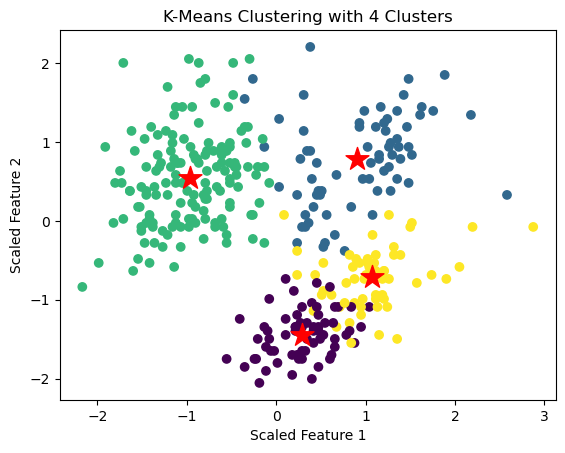

In [300]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='*', s=300)
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('K-Means Clustering with 4 Clusters')
plt.show()


## Findings:

#### Cluster 1: 
These penguins might have shorter culmens and flippers than larger penguins. It is possible that these are younger or smaller species. There is a possibility that this cluster could be adapted to a specific ecological niche.

#### Cluster 2: 
These penguins may have long culmens but short flippers, which suggests they have adapted to different habitats or prey preferences.

#### Cluster 3: 
There is a possibility that some penguins have longer flippers and a heavier body mass, suggesting that they have been adapted for long-distance swimming and may follow a deeper or more aggressive diet strategy.

#### Cluster 4: 
These penguins may represent a generalist species with a broad range of feeding strategies, perhaps with a balance between their culmen and flippers.

## Summary:

Based on the K-means clustering of the penguin dataset, it is likely that the penguins have distinct physical characteristics or ecological adaptations. Clusters represent groups of penguins that have similar physical dimensions, which could be related to:

#### Dietary Preferences: 
It is possible to distinguish different diet preferences based on the size and shape of the beak.

#### Age or Species Variations: 
It is possible that different clusters within the dataset represent different species or age groups exhibiting physical growth or variation.

#### Habitat Adaptations: 
The length of flippers may vary depending on the type of swimming needed in a given oceanic environment.

#### Biological Impacts: 
In order to assist biologists and ecologists in determining how penguin species or populations of the same species are adapting to their environment, it is helpful to understand these clusters. In addition, it is able to assist in conservation efforts through the identification of potentially vulnerable groups based on their physical characteristics and inferred behavior. This information can then be used to develop strategies to protect the species or populations that are most at risk. Additionally, it can help inform policy decisions about conservation and management of penguin species and populations.

## Conclusion

In this study, K-means clustering is used as an exploratory tool for identifying natural groupings within the penguin data that may reflect meaningful biological and ecological differences. Based on the results of the analysis, it appears that penguin behavior, physiology, and adaptation might be influenced by differences in body size and proportion. In order to gain a deeper understanding of the significance of these physical clusters, further research may involve correlating genetic data or environmental factors. As a preliminary step towards exploring the complex dynamics of penguin populations, this hypothetical analysis can serve as a starting point for further research.